# 教師なし学習とは何か記述せよ

教師なし学習(Unsupervised Learning)は、学習データにラベルを付けないで学習する方法とのことです。

2012年にGoogleが猫を認識できるAIを作成したことが大きなニュースになったのは、それが教師なし学習だったからということらしく、今機械学習、人工知能を学ぶというと、この教師なし学習を知らないで、学んだということが言えなくなってきたといえるのではないでしょうか。


先のGoogleの例では、Web上の画像や動画をラベルなしで1週間読み取るうちに、AIが自律的に「猫」というものを認識するようになりました。
これは、幼児が毎日いろいろなものを見るうちに、自然と「こういうものが猫ってものか」と認識してゆくのに似ています。


学習対象のデータはあるが、それが何かという正解（文脈によってはラベル、教師信号ともいう）は与えられていないので、どうにかしてなにかしらの構造や法則を見出すための手法です。

さて具体的に、クラスタリングの例で説明しましょう。

## 必要なライブラリをimport

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

## csvファイルの読み込み

In [263]:
train_df = pd.read_csv('./Wholesale customers data.csv')
train_df.sample(50)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
183,1,3,36847,43950,20170,36534,239,47943
246,1,1,8885,2428,1777,1777,430,610
69,1,3,8352,2820,1293,779,656,144
377,1,3,38793,3154,2648,1034,96,1242
159,2,3,355,7704,14682,398,8077,303
206,1,1,6373,780,950,878,288,285
325,1,2,32717,16784,13626,60869,1272,5609
302,2,2,2886,5302,9785,364,6236,555
214,2,1,2362,6551,11364,913,5957,791
318,1,2,11800,2713,3558,2121,706,51


In [264]:

train_df.info()
print('_'*40)
print("サンプルの数：{} 　特徴量の数：{}\n".format(*train_df.shape))
print("各特徴量の型\n",train_df.dtypes,"\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB
________________________________________
サンプルの数：440 　特徴量の数：8

各特徴量の型
 Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object 



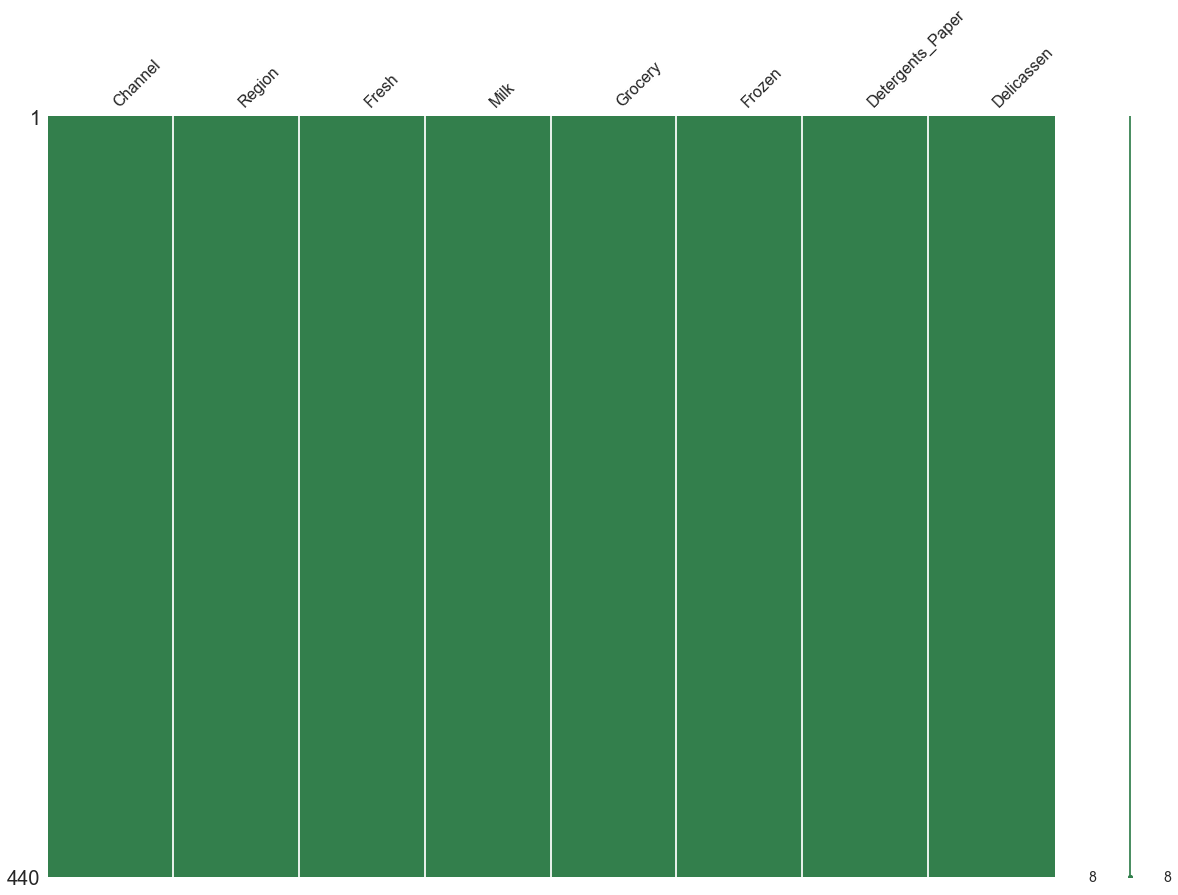

In [265]:
import missingno as msno
msno.matrix(df=train_df, figsize=(20,14), color=(0.2,0.5,0.3))

In [266]:
print("統計量の要約")
train_df.describe()


統計量の要約


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## 不要な特徴量を消す

データを眺めてみた結果、ChannelとRegionは他の６つと異なるタイプのデータのようです。

UCIのページも参考にしてみると、ChannelにはHoreca(1)またはRetail(2)というラベルが入っていることが分かります。 

Horecaは食品業界の用語で「Hotel/Restaurant/Café」の略称、Retailは小売店の意味です。 

また、Regionは顧客の地域のデータで、Lisbon(1)、Oporto(2) 、Other Region(3)のラベルです。

首都リスボン、第二の都市ポルト、その他の地域です。


今回はこのChannelとRetailどちらのグループが売り上げと関係が深いかクラスタリングで考えていきます。

この特徴量を入れてk-meansを行ってしまうとChannelとRegionに基づいたクラスタが形成されると考えられます。

よって、今回のクラスタリングではChannelとRegionを消し、年間の購入金額についての6つの特徴量だけを使うことにします。 

そして、ChannelとRegionといった人間にとって明確なグループと、それぞれの特徴量である売り上げが左右されるかクラスタリングで調べていきます。


In [267]:
#元のデータはdata_originalに格納しておく
data_original = train_df.copy()

#dataからChannelとRegionの2列を削除するコードを記述
data = train_df.drop(['Channel', 'Region'], axis=1)

#消えていることを確認
display(data.head())



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [268]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## データを眺めておく

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22d79160>,
      dtype=object)

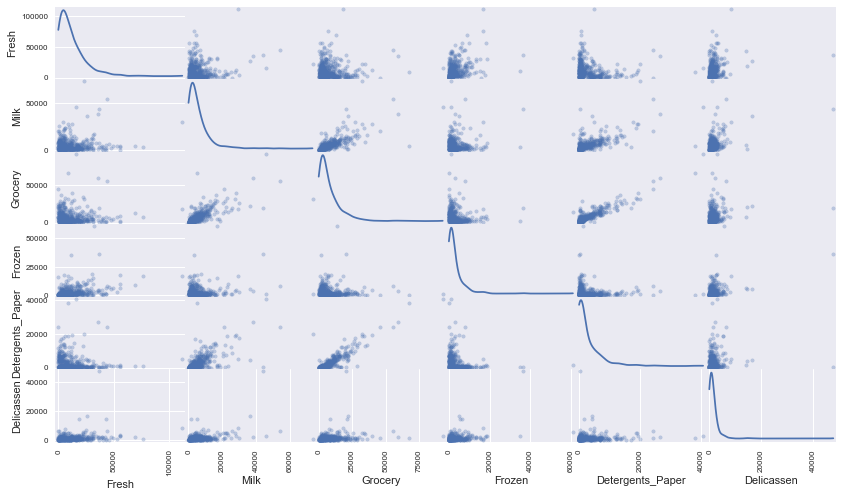

In [269]:
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

## Feature Scalingの実行

In [270]:
#普通のStandardization
data_st =  (data - data.mean() ) / data.std()
data_st.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-5.677277e-17,-6.055762e-17,-6.257621e-17,3.658690e-17,5.500650e-17,-1.135455e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.486033e-01,-7.779096e-01,-8.363823e-01,-6.276286e-01,-6.037292e-01,-5.396501e-01
25%,-7.015353e-01,-5.776488e-01,-6.101418e-01,-4.798844e-01,-5.505082e-01,-3.959498e-01
50%,-2.764455e-01,-2.939234e-01,-3.362856e-01,-3.184420e-01,-4.331074e-01,-1.983509e-01
75%,3.900786e-01,1.888771e-01,2.845866e-01,9.935132e-02,2.182338e-01,1.047406e-01
max,7.918724e+00,9.173208e+00,8.926367e+00,1.190545e+01,7.958613e+00,1.645971e+01


In [271]:
#対数変換
data_fs = data.apply(np.log)
data_fs.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


## 再度データを眺めておく

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d000240>,
      dtype=object)

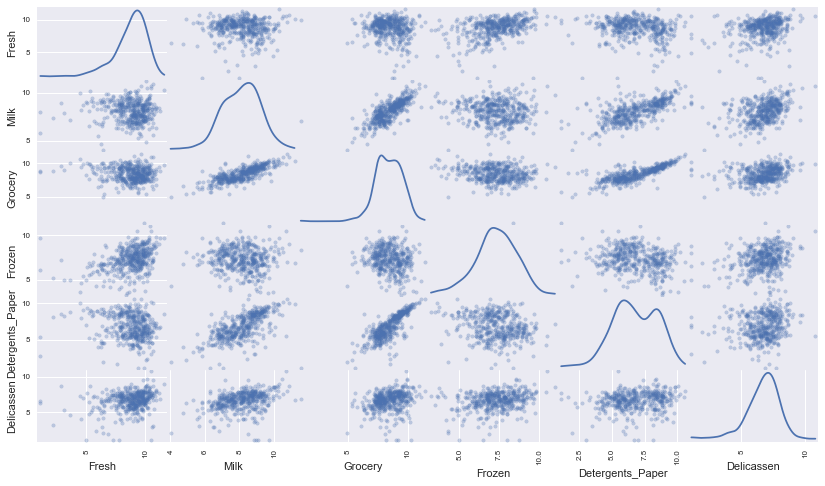

In [272]:
pd.scatter_matrix(data_fs, alpha = 0.3, figsize = (14,8), diagonal = 'kde')

## なぜFeature Scalingが必要なのか記述せよ

答え：feature scaling とは、特徴量の取りうる値の範囲＝スケールを変えることです。
特徴量間でスケールが異なることはよくあります。
例えば、体重と身長、家の価格と部屋数では、その単位と値の範囲が異なります。
その特徴量間のスケールの違いがあると、モデルをうまく学習させることができないことがあります。
なので、学習前に特徴量間でスケールを揃える必要があります。

基本は、標準化を用います。正規化だと、外れ値が強く影響してしまうからです。標準化であれ、変換後も外れ値は外れ値として扱われます。

また以下のようなモデルを用いる際は、標準化を用います。モデルの中にはFeature scalingしなくても問題ないときもあります。

- 使うべきとき
ロジスティック回帰、SVM、NNなど勾配法を用いだモデル（上述の理由のため）
kNN, k-meansなどの距離を用いるモデル
PCA, LDA, kernel PCA などのfeature extractionの手法

- 使わなくてよいとき
決定木、random forest

# PCAの実行

PCAを行いましょう。分散説明率の累積が70%を超える数の主成分を選びます。

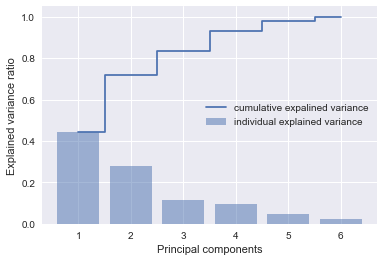

In [273]:
#data_fsに対しPCAを行い分散説明率の累積を確認
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets



# 主成分分析する
pca = PCA(n_components=6)
pca.fit(data_fs)

data_pca = pca.fit_transform(data_fs)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()



### 固有ベクトル

In [274]:
eigenvectors = pca.components_
print("固有ベクトル")
print(eigenvectors)

固有ベクトル
[[ 0.17371704 -0.394463   -0.45436364  0.17219603 -0.74551495 -0.1494356 ]
 [-0.68513571 -0.16239926 -0.06937908 -0.487691   -0.04191162 -0.50970874]
 [-0.67351166  0.03306794 -0.03218274  0.28481122 -0.21824404  0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [-0.00082162  0.72228834  0.34799325 -0.03624337 -0.56366476 -0.19536639]
 [-0.02927638  0.54303508 -0.81390826 -0.0174477   0.20244363 -0.02283197]]


### 固有値

In [275]:
#固有値（各主成分におけるデータの分散）
eigenvalue= pca.explained_variance_
eigenvalue

array([4.82682393, 3.01771654, 1.26758903, 1.04940662, 0.49926069,
       0.25038268])

### 70％以上になる値は

In [276]:
#分散説明率が70%を超える数の主成分
(eigenvalue[0] + eigenvalue[1]) / np.sum(eigenvalue)

0.7189452317370727

In [277]:
#分散説明率が70%を超える数の主成分を選び、data_pcaに格納する
data_pca = eigenvectors[0:2]
data_pca

array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874]])

In [278]:
#explained_variance_ratio_
print(pca.explained_variance_ratio_)

[0.44237417 0.27657107 0.11617342 0.09617719 0.0457568  0.02294735]


## なぜPCAを行うのか記述せよ

PCAは、代表的なコンポーネントを割り出すことです。今回はこれを、「次元削減」に用います。

つまり、
前処理として用います。

文字通り、データの次元数を減らすことです。
ここでいう「次元数」は、データセットのフィーチャーの数と言い換えることができ、

Freshで44％とMilkで28％なので、累積70パーセント以上の説明力のあるコンポーネントはFreshとMilkであることがわかりました。

これを用いてクラスタリングしたいと思います。

# クラスタリングとは何か記述せよ

クラスタリングとはデータの集合をクラスタという部分集合に分ける手法です。

隠れたグループや関係性を発見することが目的で、アマゾンのレコメンデーションや商品開発のターゲット層を見つけ出すのに使われています。

階層的手法は関係や距離が近いものから順番に組み合わせていくので階層によって任意のクラスターに分けることができます。

非階層的手法は分ける数を指定して分割を行う手法ですべての距離を計算する必要がないので大規模なデータをさっと分けたいときに用いられます。

デメリットとして開始点がランダムに決まるため結果が変わることがあるので再現性が求められる場面では用いられません。

またクラス分類とクラスタリングは名前こそ似ているが、クラス分類は正解データがあるのに対し、クラスタリングは正解がなく分類数も人間の主観で決めることができます。

正解がないため、出てきたパターンから人間が解釈を行ってアクションにつなげる必要があります。

## 樹状図を描く

まずは階層的手法を使い、樹状図を描いてみます。手法はいくつもありましたが、ward法が良いでしょう。

In [279]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(data_fs, metric='euclidean')))
print(row_dist)

          0         1         2         3         4         5         6    \
0    0.000000  2.228506  3.088862  4.370853  3.335270  1.310767  1.647395   
1    2.228506  0.000000  1.542136  3.265387  1.989303  1.362980  2.176584   
2    3.088862  1.542136  0.000000  3.432707  1.651791  2.295854  3.342786   
3    4.370853  3.265387  3.432707  0.000000  2.407488  3.264068  3.560555   
4    3.335270  1.989303  1.651791  2.407488  0.000000  2.412860  3.235635   
5    1.310767  1.362980  2.295854  3.264068  2.412860  0.000000  1.561235   
6    1.647395  2.176584  3.342786  3.560555  3.235635  1.561235  0.000000   
7    2.333955  0.781000  1.337492  2.907066  1.699507  1.492109  2.111804   
8    1.599339  2.094442  3.139531  3.410168  3.259593  1.245439  1.008493   
9    2.347990  1.169375  1.922346  4.240870  2.747458  2.108975  2.523150   
10   3.499069  1.479770  1.955458  3.412324  2.578349  2.673123  2.996408   
11   3.458258  3.243439  4.047937  1.980645  3.299428  2.688773  2.348229   

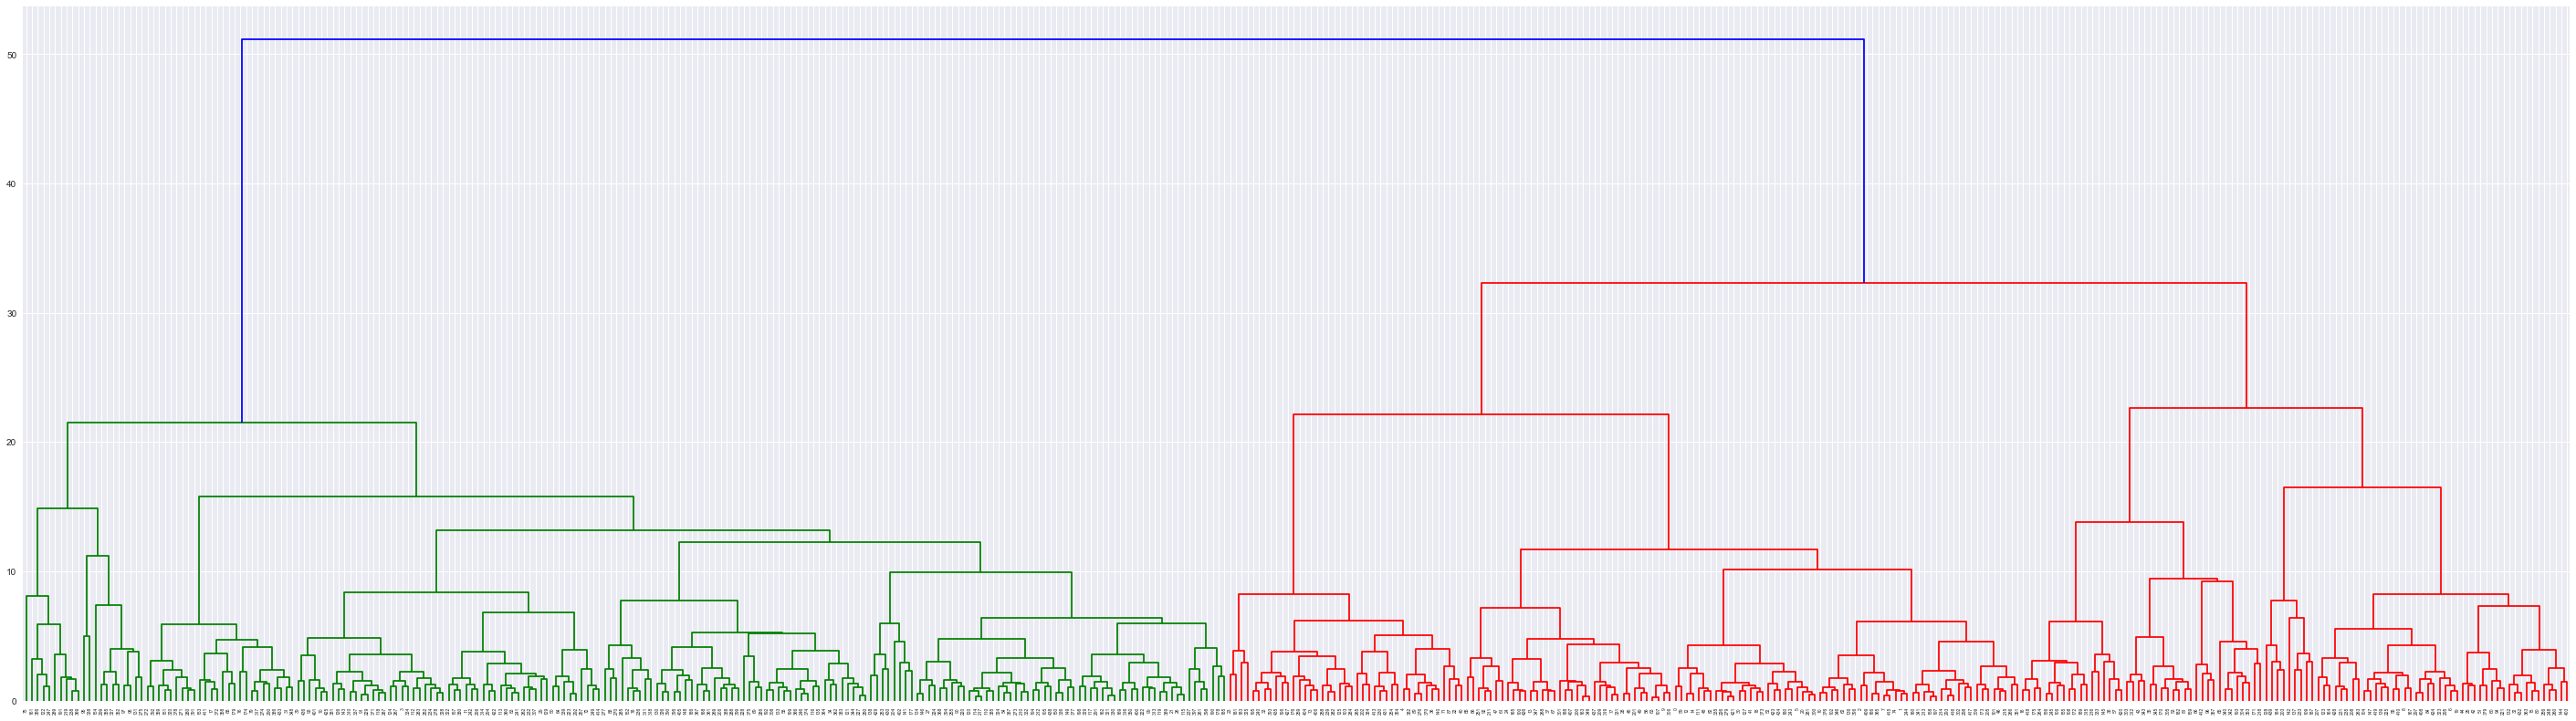

In [280]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(50,14))
row_clusters = linkage(pdist(data_fs, metric='euclidean'), method='ward')
row_dender = dendrogram(row_clusters)
plt.show()

In [281]:
row_clusters

array([[6.30000000e+01, 1.07000000e+02, 2.74658639e-01, 2.00000000e+00],
       [1.58000000e+02, 1.97000000e+02, 3.16208599e-01, 2.00000000e+00],
       [1.14000000e+02, 2.17000000e+02, 3.39241292e-01, 2.00000000e+00],
       ...,
       [8.70000000e+02, 8.73000000e+02, 2.26634274e+01, 9.50000000e+01],
       [8.75000000e+02, 8.76000000e+02, 3.23187651e+01, 2.32000000e+02],
       [8.74000000e+02, 8.77000000e+02, 5.11775576e+01, 4.40000000e+02]])

In [282]:
from sklearn.cluster import AgglomerativeClustering
complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_complete = complete.fit_predict(data_fs)
print(y_complete)

[2 2 2 1 2 2 0 2 0 2 2 1 2 2 2 0 0 1 2 0 2 1 2 2 2 0 1 1 2 1 2 1 0 2 1 0 2
 2 0 1 2 2 0 0 0 2 2 2 2 2 1 0 2 0 1 0 2 0 1 2 0 2 2 2 1 0 0 2 1 1 1 2 1 2
 2 1 1 2 1 1 0 0 2 1 0 2 2 2 1 2 1 1 2 1 0 1 0 1 1 1 2 2 2 2 0 1 0 2 0 0 1
 2 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 0 1 1 1 0 1 1 1 2 0 1 0 2 1 0 1 0 0 1 0
 1 1 1 1 1 1 1 0 0 1 2 0 2 1 1 2 0 2 2 0 1 1 0 0 0 2 1 0 2 1 1 1 2 2 0 2 0
 1 1 0 2 0 1 1 1 0 1 2 2 2 1 1 2 2 2 0 1 2 1 0 0 2 1 2 1 2 2 2 0 1 0 1 1 0
 1 1 1 0 2 1 1 1 2 0 1 0 1 0 1 1 1 2 2 1 1 2 2 0 1 1 0 1 1 2 1 1 2 1 0 1 2
 2 0 1 1 0 0 2 2 1 2 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 1 1 1 1 1 1 1 2 1 0
 1 0 2 1 2 2 2 0 0 0 2 1 1 2 1 1 0 1 1 0 1 1 1 2 1 1 1 0 1 2 1 1 1 1 1 2 1
 0 1 2 1 1 1 1 0 2 0 0 1 0 2 2 1 2 1 2 1 0 2 1 1 0 1 1 1 1 1 0 1 2 1 1 1 1
 2 1 1 2 1 1 2 1 1 0 1 1 2 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 0 2 1 2
 2 0 2 0 1 0 2 1 2 2 2 0 0 0 2 1 2 0 1 2 2 0 1 1 2 0 1 2 2 1 2 1 0]


## k-meansにおけるkの値の検討

クラスタリングはk-meansが定石です。まずはクラスタ数kの値を検討します。
まずはそのためのコードを記述し、その後選んだkの値と、それに決めた理由を記述してください。

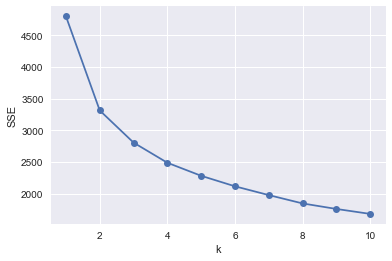

In [283]:
#クラスタ数を検討するためのコードを記述
#エルボー法
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(data_fs)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

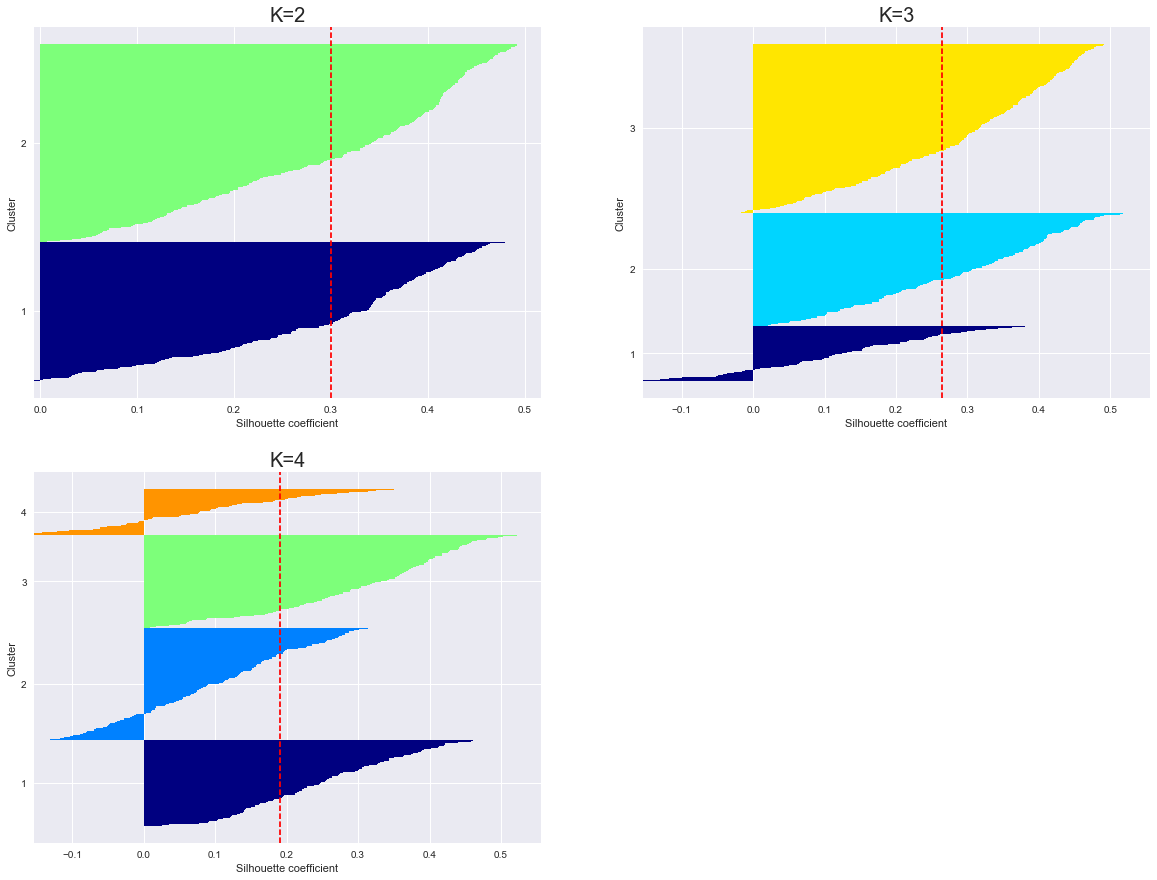

In [284]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np

plt.figure(figsize=(20,15))
for j in range(2,5):
    plt.subplot(2,2,j-1)
    km = KMeans(n_clusters=j, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(data_fs)

    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_fs, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title('K='+str(j),fontsize=20)
plt.show()


k=2


理由：


エルボー法の図から、傾きが緩やかに変化していることが確認できる。
シルエット分析もn_clusters=2にしたときに２つの帯が平均シルエット係数を超えており、かつ厚みが似通ってきつつある。
この手法から今回はk＝2が妥当と位置付けられる。

## k-meansの実行

In [285]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(data_fs)
print(y_km)


[0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1
 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1]


## クラスタリングの可視化

In [286]:
#散布図を描くコードを記述
#中心点もプロットする
pca_vector = data_pca
pca_vector

array([[ 0.17371704, -0.394463  , -0.45436364,  0.17219603, -0.74551495,
        -0.1494356 ],
       [-0.68513571, -0.16239926, -0.06937908, -0.487691  , -0.04191162,
        -0.50970874]])

In [289]:
data_pca = np.dot( data_fs, pca_vector.T)

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  # This is added back by InteractiveShellApp.init_path()
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


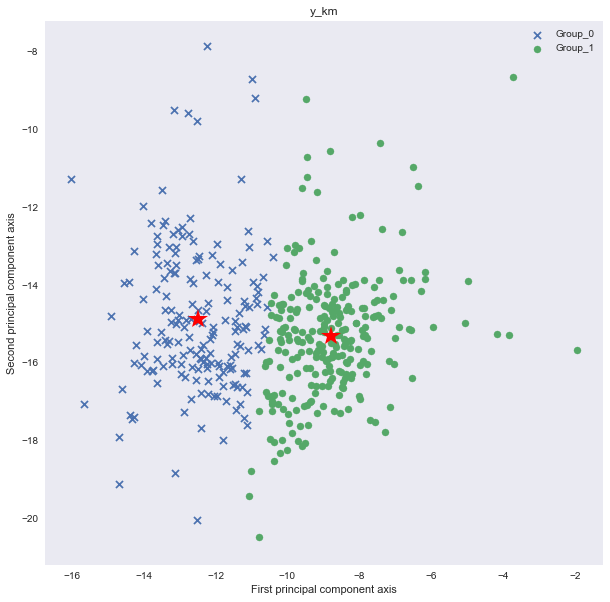

In [291]:
plt.figure(figsize =(10,8))
plt.title('y_km')

data_zero = data_pca[y_km==0]
data_one = data_pca[y_km==1]

# plt.scatter(data_pca[:,0], data_pca[:,1], c=y_km , marker='o', s=50)
plt.scatter(data_zero[:,0], data_zero[:,1], marker='x', s=50, label='Group_0')
plt.scatter(data_one[:,0], data_one[:,1], marker='o', s=50, label='Group_1')
plt.grid()
plt.hold(True)
centroid = np.dot(km.cluster_centers_, pca_vector.T)
plt.plot(centroid[:,0], centroid[:,1], "*", MarkerSize =20, MarkerFaceColor = 'r', MarkerEdgeColor = 'r')
plt.legend()
plt.xlabel("First principal component axis")
plt.ylabel("Second principal component axis")
plt.show()

## 既知のグループとの比較

分けて終わりではありません。できあがったクラスタから何か有益なものを得ましょう。これまでの様々な作業はこのためにあったのであり、ここが一番大切です。

ChannelとRegionというグループ分けが元々存在していました。今回作ったクラスタと、Channel、Regionで色分けをして比較してみましょう。
比較に使ったコードと、どのような結果だったかの説明を記述してください。

### Regionについて

Regionは顧客の地域のデータで、Lisbon(1)、Oporto(2) 、Other Region(3)のラベルです。
首都リスボン、第二の都市ポルト、その他の地域です。

In [300]:
#data_originalの中身のRegionが１だったら、Lisbonなので、pcaの中から選んで
data_Lisbon= data_pca[data_original["Region"]==1]
data_lisbon.shape

(77, 2)

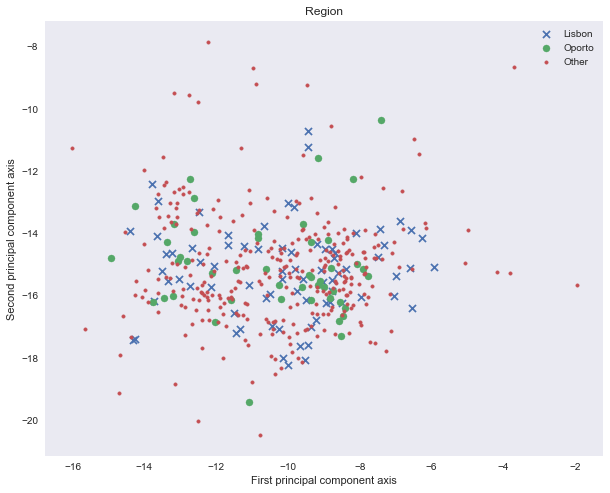

In [301]:
plt.figure(figsize =(10,8))
plt.title('Region')

data_Lisbon= data_pca[data_original["Region"]==1]
data_Oporto = data_pca[data_original["Region"]==2]
data_Other = data_pca[data_original["Region"]==3]

plt.scatter(data_Lisbon[:,0], data_Lisbon[:,1], marker='x', s=50, label='Lisbon')
plt.scatter(data_Oporto[:,0], data_Oporto[:,1], marker='o', s=50, label='Oporto')
plt.scatter(data_Other[:,0], data_Other[:,1],marker='.', s=50, label='Other')

plt.grid()
plt.xlabel("First principal component axis")
plt.ylabel("Second principal component axis")
plt.legend()
plt.show()

In [ ]:
ChannelにはHoreca(1)またはRetail(2)というラベルが入っていることが分かります。
Horecaは食品業界の用語で「Hotel/Restaurant/Café」の略称、Retailは小売店の意味です。

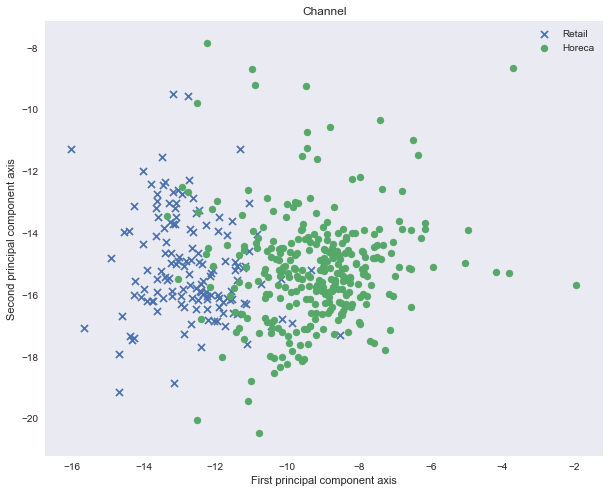

In [306]:
plt.figure(figsize = (10,8))
plt.title('Channel')

data_Horeca= data_pca[data_original["Channel"]==1]
data_Retail= data_pca[data_original["Channel"]==2]

plt.scatter(data_Retail[:,0], data_Retail[:,1], marker = 'x', s=50, label='Retail')
plt.scatter(data_Horeca[:,0], data_Horeca[:,1], marker = 'o', s=50, label='Horeca')


plt.grid()
plt.xlabel("First principal component axis")
plt.ylabel("Second principal component axis")
plt.legend()
plt.show()

In [ ]:
どうやら、導き出したクラスタと、Channelが似通った傾向が見られた。
これを詳しく見ていく。


### 説明するための特徴を増やす

In [308]:
#ClusterデータをDataFrameにする
a =pd.DataFrame(y_km)
a

,0
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [311]:
#合わせる
data_y_km =pd.concat([data_original,pd.DataFrame(y_km)],axis=1)
data_y_km

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,0
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
5,2,3,9413,8259,5126,666,1795,1451,0
6,2,3,12126,3199,6975,480,3140,545,0
7,2,3,7579,4956,9426,1669,3321,2566,0
8,1,3,5963,3648,6192,425,1716,750,0
9,2,3,6006,11093,18881,1159,7425,2098,0


In [313]:
data_y_km['Total_Amount']= data_y_km['Fresh']+data_y_km['Milk']+data_y_km['Grocery']+data_y_km['Frozen']+data_y_km['Detergents_Paper']+data_y_km['Delicassen']

In [314]:
data_original['Total_Amount']= data_original['Fresh']+data_original['Milk']+data_original['Grocery']+data_original['Frozen']+data_original['Detergents_Paper']+data_original['Delicassen']

In [315]:
df_group0 = data_y_km[data_y_km[0] == 0].describe()
df_group1 = data_y_km[data_y_km[0] == 1].describe()
df_group0 = df_group0.drop(0, axis=1).loc['mean','Fresh':]
df_group1 = df_group1.drop(0, axis=1).loc['mean','Fresh':]

In [316]:
data_original['Total_Amount']= data_original['Fresh']+data_original['Milk']+data_original['Grocery']+data_original['Frozen']+data_original['Detergents_Paper']+data_original['Delicassen']
df_horeca=data_original[data_original['Channel']==1].describe()
df_retail=data_original[data_original['Channel']==2].describe()
df_horeca = df_horeca.loc['mean','Fresh':]
df_retail = df_retail.loc['mean','Fresh':]

## 出てきたクラスタと、顧客セグメントが似通っているというグラフ

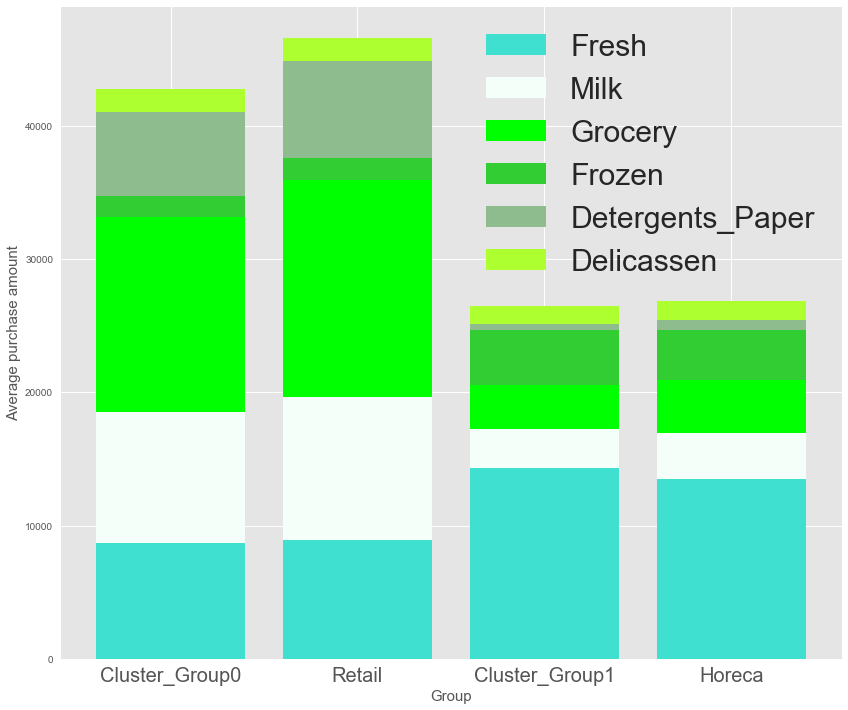

In [324]:
plt.figure(figsize=(14,12))

data = []
bar = []
colors = ['turquoise', 'mintcream', 'lime', 'limegreen', 'darkseagreen', 'greenyellow']
positions = range(1, 5) #x軸の位置
len_column  = 6#len(df_group0.columns)
for i in range(len_column):
    data.append(np.array([df_group0[i], df_retail[i], df_group1[i], df_horeca[i]]))
    bottom = np.array([.0, .0, .0, .0])
    for j in range(i):
        bottom += data[j]
    bottom
    if i == 0:
        bar.append(plt.bar(positions, data[i], align = 'center', color = colors[i]))
    else:
        bar.append(plt.bar(positions, data[i], align = 'center', bottom = bottom, color = colors[i])) 
    
x_labels = ['Cluster_Group0', 'Retail', 'Cluster_Group1','Horeca'] #x軸に表示するラベル

plt.xticks(positions, x_labels,fontsize=20) #x軸の値の変更
# plt.ylim(0, 30000) #y軸の表示範囲 
plt.legend((bar),('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'),fontsize=30) #凡例の表示
plt.style.use('ggplot')
plt.xlabel("Group", fontsize=15)
plt.ylabel("Average purchase amount", fontsize=15)
plt.show() #グラフの表示

# 卸売業者への報告（フォーカスセグメントの具体化）

クラスタリングを行ったことを元に、卸売業者に対して有益な情報を報告してください。クラスタリングについては詳しくない卸売業者の経営陣に説明するような平易な書き方を心がけてください。それぞれの集団がどんなグループなのか？グループ間の売り上げを調べるとどのようなことが分かるか？どこに何を売り込むのがいいか？など様々な視点から考えてみましょう。

セグメンテーションから考える仕事作りへアドバイス


- すでに知られているグループとして、Region(地域）、Channel（事業者）というのがある。
- 特に顧客単価で差が出たのは、Channelの方であった
- 地域セグメントよりも、事業者セグメントを見ていったほうが、売り上げが上がるヒントがあると言える。
- 例えば、事業者の中でも、小売セグメントは、horecaセグメントよりもそもそも１社あたりの平均単価が１.７倍大きい。
- ミルク、食料品、洗剤と紙類が貢献している
- 一方でhorecaセグメントでは、生鮮食料品の貢献度合いが高い。
- 地域セグメントに注力しているような仕事があるならば、やめてしまい、事業者セグメントに注力して仕事を組み直すなどしたほうが良い。



# 自学自習用

In [ ]:
#散布図を描くコードを記述
#中心点もプロットする
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(3):
    clusterinfo['cluster' + str(i)] = data_pca[data_pca['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 3 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)